11490434/11490434 [==============================] - 0s 0us/step


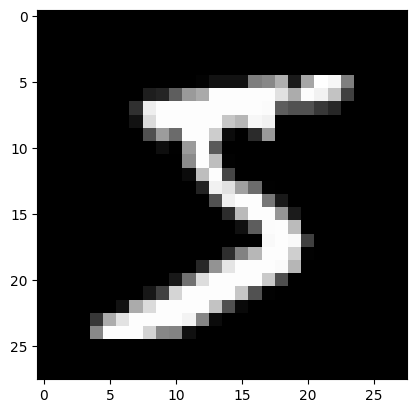

In [2]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

plt.imshow(x_train[0], cmap="gray")

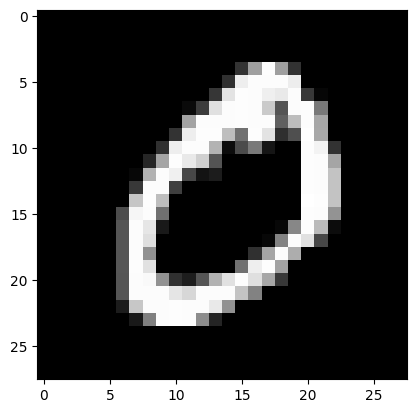

In [3]:
plt.imshow(x_train[1], cmap="gray")

In [4]:
x_train[0].shape

(28, 28)

In [5]:
28*28

784

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [43]:
x_train = x_train/255.0

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")


decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="relu")(decoder_input)
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

optimizer = tf.keras.optimizers.legacy.Adam(lr=0.001)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 784)               50960     
                                                                 
 reshape_3 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
Total params: 105360 (411.56 KB)
Trainable params: 1053

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [34]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Supongamos que ya tienes tu modelo de autoencoder definido
autoencoder = Sequential()
# Agrega tus capas al modelo de autoencoder...

# Define el optimizador
opt = Adam(learning_rate=0.001)  # Puedes ajustar la tasa de aprendizaje según sea necesario

# Compila el modelo de autoencoder
autoencoder.compile(optimizer=opt, loss='mse')

In [35]:
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/3
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00


In [36]:
example = encoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]

print(example)

1/1 [==============================] - 0s 49ms/step
[0.34018794 0.         0.         0.         0.         0.40422496
 0.47452575 0.         0.         0.         0.         0.
 0.53501034 0.         0.         0.         0.41138408 0.
 0.         0.5155208  0.         0.         0.5166345  0.1934535
 0.23864795 0.9870006  1.0115916  0.6335997  0.         0.0075147
 0.         0.         0.6354762  0.7625333  0.08451418 0.
 0.41985297 0.04934935 0.0019522  0.         0.10304391 0.6382737
 0.53851306 0.         0.         0.         0.         0.
 0.         0.         0.62875974 0.         0.6331482  0.3629265
 0.         0.         0.38029203 0.309655   0.         0.24464896
 0.         0.13954878 0.         0.04805906]


In [17]:
example.shape

(64,)

In [37]:
64/784


0.08163265306122448

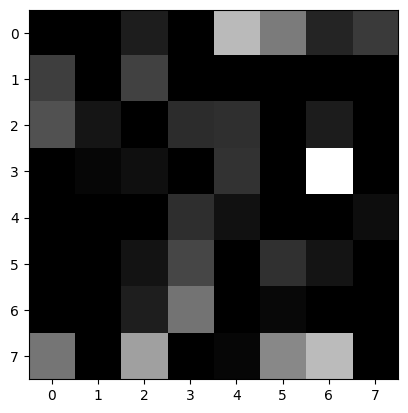

In [20]:
plt.imshow(example.reshape((8,8)), cmap="gray")

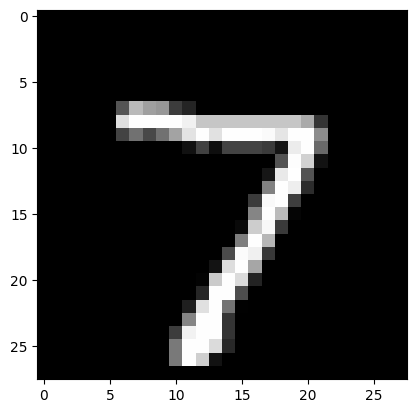

In [21]:
plt.imshow(x_test[0], cmap="gray")

In [22]:
ae_out = autoencoder.predict([x_test[0].reshape(-1, 28, 28, 1)])[0]

1/1 [==============================] - 0s 39ms/step


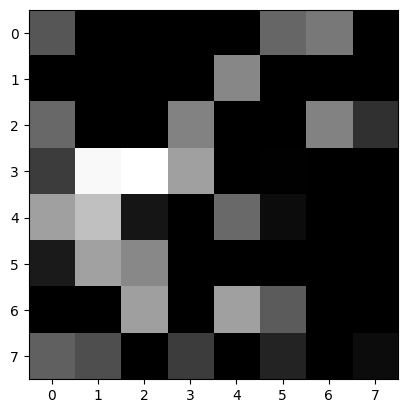

In [46]:
plt.imshow(example.reshape((8,8)), cmap="gray")

1/1 [==============================] - 0s 201ms/step


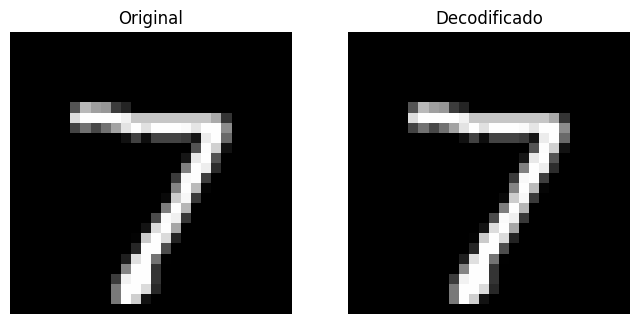

1/1 [==============================] - 0s 53ms/step


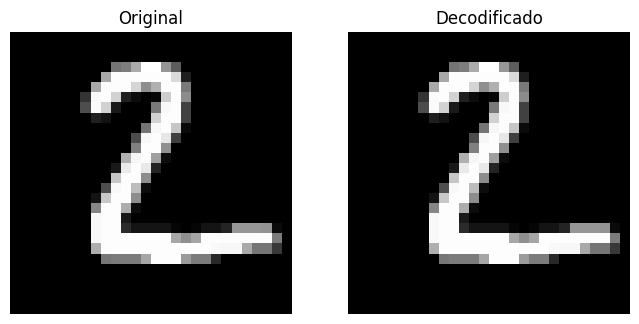

1/1 [==============================] - 0s 44ms/step


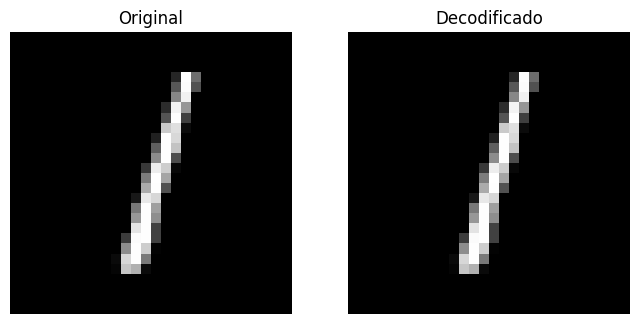

1/1 [==============================] - 0s 69ms/step


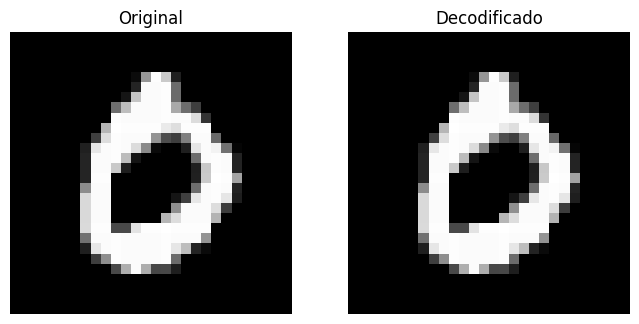

1/1 [==============================] - 0s 39ms/step


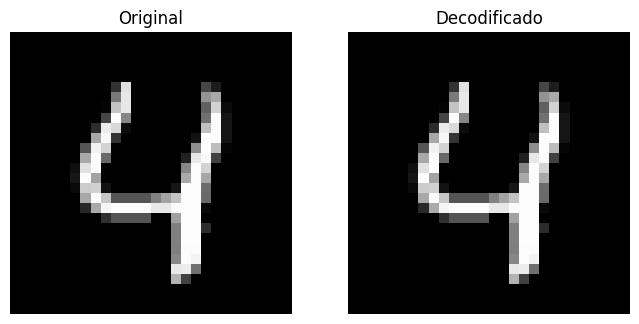

In [50]:
import matplotlib.pyplot as plt

# Supongamos que x_test es tu conjunto de datos de prueba

for d in x_test[:5]:  # Muestra solo 5 ejemplos, siéntete libre de mostrar más o menos según desees
    # Ajusta las dimensiones si es necesario y realiza la predicción
    ae_out = autoencoder.predict(d.reshape(-1, 28, 28, 1))
    img = ae_out[0]

    # Muestra las imágenes utilizando Matplotlib
    plt.figure(figsize=(8, 4))

    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(d.reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Imagen decodificada por el autoencoder
    plt.subplot(1, 2, 2)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title('Decodificado')
    plt.axis('off')

    # Muestra la figura
    plt.show()

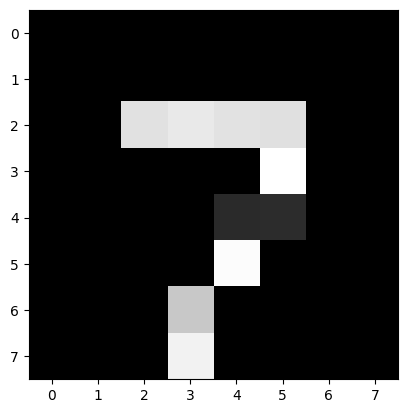

In [51]:
smaller = cv2.resize(x_test[0], (8,8))
back_to_original = cv2.resize(smaller, (28,28))
plt.imshow(smaller, cmap="gray")

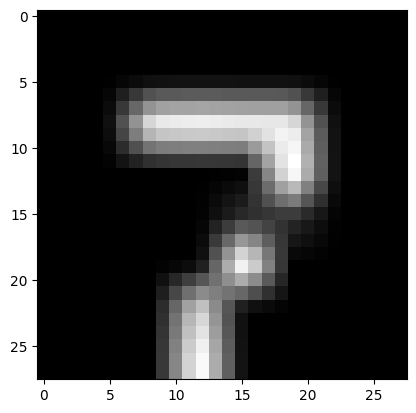

In [52]:
plt.imshow(back_to_original, cmap="gray")